In [2]:
from House_Price_function import *

In [ ]:
%time location_name , house_name , house_price , location_div = search_real_estate()

In [3]:
import pandas as pd
# df = pd.DataFrame()
# df['location_name'] = location_name
# df['house_name'] = house_name
# df['house_price'] = house_price
# df['location_div'] = location_div

In [ ]:
df.to_csv('seoul_location_info.csv',index=False)

In [7]:
train_df = pd.read_csv('seoul_location_info.csv')

In [1]:
tuned_df.to_csv('seoul_location_info.csv',index=False)

NameError: name 'tuned_df' is not defined

In [ ]:
display(tuned_df.tail())
display(tuned_df.descrbe())

In [10]:
import pandas as pd
import re

In [11]:
train_df = pd.read_csv('seoul_location_info.csv')

In [12]:
train_df.head()

,location_name,house_name,house_price,location_div,location,supply_loc,only_loc,supply_location,only_location
0,강남구,청담자이,113000,111A/82,111.0,111A,/82,111.0,82
1,강남구,청담자이,70000,120B/89,120.0,120B,/89,120.0,89
2,강남구,청담자이,110000,111A/82,111.0,111A,/82,111.0,82
3,강남구,삼성힐스테이트2단지,10000,109A/84,109.0,109A,/84,109.0,84
4,강남구,청담자이,230000,110B/82,110.0,110B,/82,110.0,82


In [13]:
train_df['supply_loc'] = [i[:i.find('/')] for i in train_df['location_div']] 
train_df['only_loc'] = [i[i.find('/'):] for i in train_df['location_div']] 
train_df['supply_location'] = [','.join(re.findall('\d',i)).replace(',','') for i in train_df['supply_loc']]
train_df['only_location'] = [','.join(re.findall('\d',i)).replace(',','') for i in train_df['only_loc']]

In [14]:
train_df['price_per_loc'] = [int(train_df['house_price'][i]) / int(train_df['only_location'][i]) for i in range(len(train_df['location']))]

In [15]:
train_df.tail()

,location_name,house_name,house_price,location_div,location,supply_loc,only_loc,supply_location,only_location,price_per_loc
37558,중랑구,신내6단지시영,17000,3/12,3.0,3,/12,3,12,1416.666667
37559,중랑구,신내8단지두산화성,39000,15/15,15.0,15,/15,15,15,2600.000000
37560,중랑구,상봉태영데시앙,65000,11/27,11.0,11,/27,11,27,2407.407407
37561,중랑구,신내9단지진흥,23000,5/15,5.0,5,/15,5,15,1533.333333
37562,중랑구,동부,24000,1/22,1.0,1,/22,1,22,1090.909091


In [16]:
train_df.to_csv('seoul_train_df.csv',index=False)

In [17]:
import matplotlib.pylab as plt
%matplotlib inline

In [18]:
unique_loc_ls = list(set(train_df['location_name']))

In [19]:
testing_df = pd.DataFrame()
for i in unique_loc_ls:
    testing_df.append(train_df[train_df['location_name']==i])

In [20]:
unique_loc_av = [train_df[train_df['location_name']==i].describe()['price_per_loc'][1] for i in unique_loc_ls]

In [21]:
import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np

In [22]:
mpl.rc('font', family='nanumgothic')
mpl.rc('axes', unicode_minus=False)

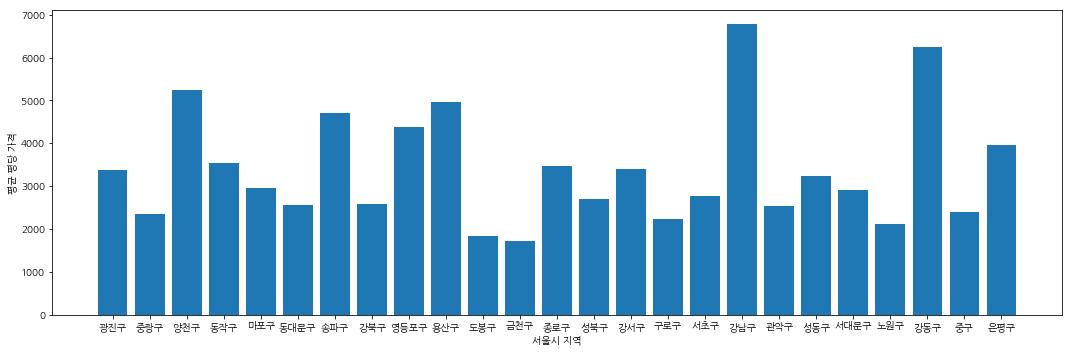

In [23]:
plt.figure(figsize=(15,5))
y = unique_loc_av
x = np.arange(len(y))
xlabel = unique_loc_ls
plt.bar(x, y)
plt.xticks(x, xlabel)
# plt.yticks(sorted(y))
plt.xlabel("서울시 지역")
plt.ylabel("평균 평당 가격")
plt.tight_layout()
plt.show()